In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import tabulate

In [2]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 100)

In [3]:
df = pd.read_csv('data/data_clean.csv')
df

kw  rank  \
0      how to finish concrete     1   
1      how to finish concrete     4   
2      how to finish concrete     5   
3      how to finish concrete     6   
4      how to finish concrete     7   
...                       ...   ...   
14632       ruched midi dress    14   
14633       ruched midi dress    16   
14634       ruched midi dress    17   
14635       ruched midi dress    19   
14636       ruched midi dress    20   

                                                    link  success  word_count  \
0      https://www.familyhandyman.com/project/how-to-...     True      1689.0   
1                https://www.wikihow.com/Finish-Concrete     True       324.0   
2      https://www.instructables.com/How-to-Finish-Co...     True      1417.0   
3      https://carrollsbuildingmaterials.com/diy-conc...     True      1600.0   
4      https://www.hunker.com/13402242/how-to-finish-...     True       738.0   
...                                                  ...      ...         ...   
14632  https://www.rihoas.com/collections/ruched-dresses     True       184.0   
14633  https://www.fashionnova.com/products/my-man-an...     True      1774.0   
14634  https://www.fashionnova.com/products/my-man-an...     True      1774.0   
14635  https://www.loft.com/petites/petite-dresses/ca...     True      1602.0   
14636  https://www.loft.com/petites/petite-dresses/ca...     True      1602.0   

       percent_human  percent_ai  
0          99.926081    0.073917  
1          88.443929   11.556073  
2          94.222470    5.777531  
3          99.730074    0.269922  
4          97.359934    2.640062  
...              ...         ...  
14632      96.125513    3.874488  
14633      63.200365   36.799634  
14634      63.163045   36.836954  
14635      92.680357    7.319643  
14636      92.680357    7.319643  

[14637 rows x 7 columns]

In [58]:
def multiplot(df):
    # define subplots
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

    #fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12), gridspec_kw={'hspace': 0.2, 'wspace': 0.1})
    # Q-Q plot
    st.probplot(df['percent_human'], dist='norm', plot=axs[0, 0])
    axs[0, 0].set_title('Figure 1: Q-Q Plot of Percent Human')
    axs[0, 0].set_xlabel('Theoretical quantiles')
    axs[0, 0].set_ylabel('Sample quantiles')
    axs[0, 0].text(0.02, 0.95, 'Data is not normally distributed\nand cannot be evaluated using Pearson\'s method', transform=axs[0, 0].transAxes, fontsize=12, verticalalignment='top', color='black')

    # Histogram
    skewness = round(st.skew(df['percent_human']),2)
    sns.histplot(data=df['percent_human'], kde=False, binwidth=1, color='green', ax=axs[0, 1])
    axs[0, 1].set_title('Figure 2: Histogram of Percent Human')
    axs[0, 1].set_xlabel('Percent Human')
    axs[0, 1].set_ylabel('Count')
    axs[0, 1].set_xlim(0, None)
    axs[0, 1].set_ylim(0, None)
    axs[0, 1].text(0.02, 0.95, f'Data has high Skewness ({skewness})', transform=axs[0, 1].transAxes, fontsize=12, verticalalignment='top', color='black')
    axs[0, 1].text(0.02, 0.90, f'Over 1/3 of data in top 2%', transform=axs[0, 1].transAxes, fontsize=12, verticalalignment='top', color='black')


    # Scatter plot of percent_human vs rank
    sns.scatterplot(data=df, x='rank', y='percent_human', color='green', alpha=0.05, s=200, edgecolor=None, ax=axs[1, 0])
    axs[1, 0].set_title('Figure 3: Scatter Plot of Percent Human vs Rank')
    axs[1, 0].set_xlabel('Rank')
    axs[1, 0].set_ylabel('Percent Human')
    axs[1, 0].set_xticks(np.arange(1, 21))

    # Scatter plot of mean percent_human vs. rank
    grouped_data = df.groupby('rank')
    mean_percent_human = grouped_data['percent_human'].mean().reset_index()
    sns.scatterplot(ax=axs[1, 1], data=mean_percent_human, x='rank', y='percent_human',  color='green')
    sns.regplot(ax=axs[1, 1], data=mean_percent_human, x='rank', y='percent_human', color='green', scatter=False, line_kws={'linestyle':'--'})
    axs[1, 1].set_title('Figure 4: Scatter Plot of Mean Percent Human vs Rank')
    axs[1, 1].set_xlabel('Rank')
    axs[1, 1].set_ylabel('Mean Percent Human')
    axs[1, 1].set_xticks(np.arange(1, 21))
    axs[1, 1].legend(handles=axs[1, 1].lines[::len(mean_percent_human)], labels=['Best fit line'])
    axs[1, 1].text(0.02, 0.05, f'Percent Human is weakly correlated to Rank with a high degree of certainty', transform=axs[1, 1].transAxes, fontsize=10, verticalalignment='top', color='black')


    # Calculate correlation coefficients and p-values
    pb_corr, pb_pval = st.pointbiserialr(df['rank'], df['percent_human'])
    spearman_corr, spearman_pval = st.spearmanr(df['rank'], df['percent_human'])
    kendall_tau, kendall_pval = st.kendalltau(df['rank'], df['percent_human'])

    # Create a dictionary to store the results
    corr = {
        'Method': ['Point Biserial', 'Spearman', 'Kendall'],
        'Correlation Coefficient': [pb_corr, spearman_corr, kendall_tau],
        'P-value': [pb_pval, spearman_pval, kendall_pval]
    }

    for key in corr:
        if isinstance(corr[key][0], float):
            corr[key] = [round(val, 4) for val in corr[key]]


    # Create a pandas dataframe from the dictionary
    df_corr = pd.DataFrame(corr)

    # Create a table to display the correlation coefficients and p-values
    col_labels = ['Method', 'Corr Coef', 'P-value']
    table_data = [col_labels] + df_corr.values.tolist()

    table = axs[1, 1].table(cellText=table_data,
                    colLabels=None,
                    cellLoc='center',
                    bbox=[0.02, 0.08, 0.5, 0.15])  # x, y, width, height
    table.set_fontsize(10)

    # Format the table to use 4 significant figures
    for i in range(1, len(table_data)):
        for j in range(1, 3):
            cell = table.get_celld()[i, j]
            cell_text = cell.get_text().get_text()
            cell_text = float(cell_text)
            cell_text = f'{cell_text:.4g}'
            cell.get_text().set_text(cell_text)

    fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
    fig.savefig('figures/Fig_1-4.png')
    plt.show()

In [59]:
df_90_10 = df[(df['percent_human'] >= 90) | (df['percent_human'] <= 10)]

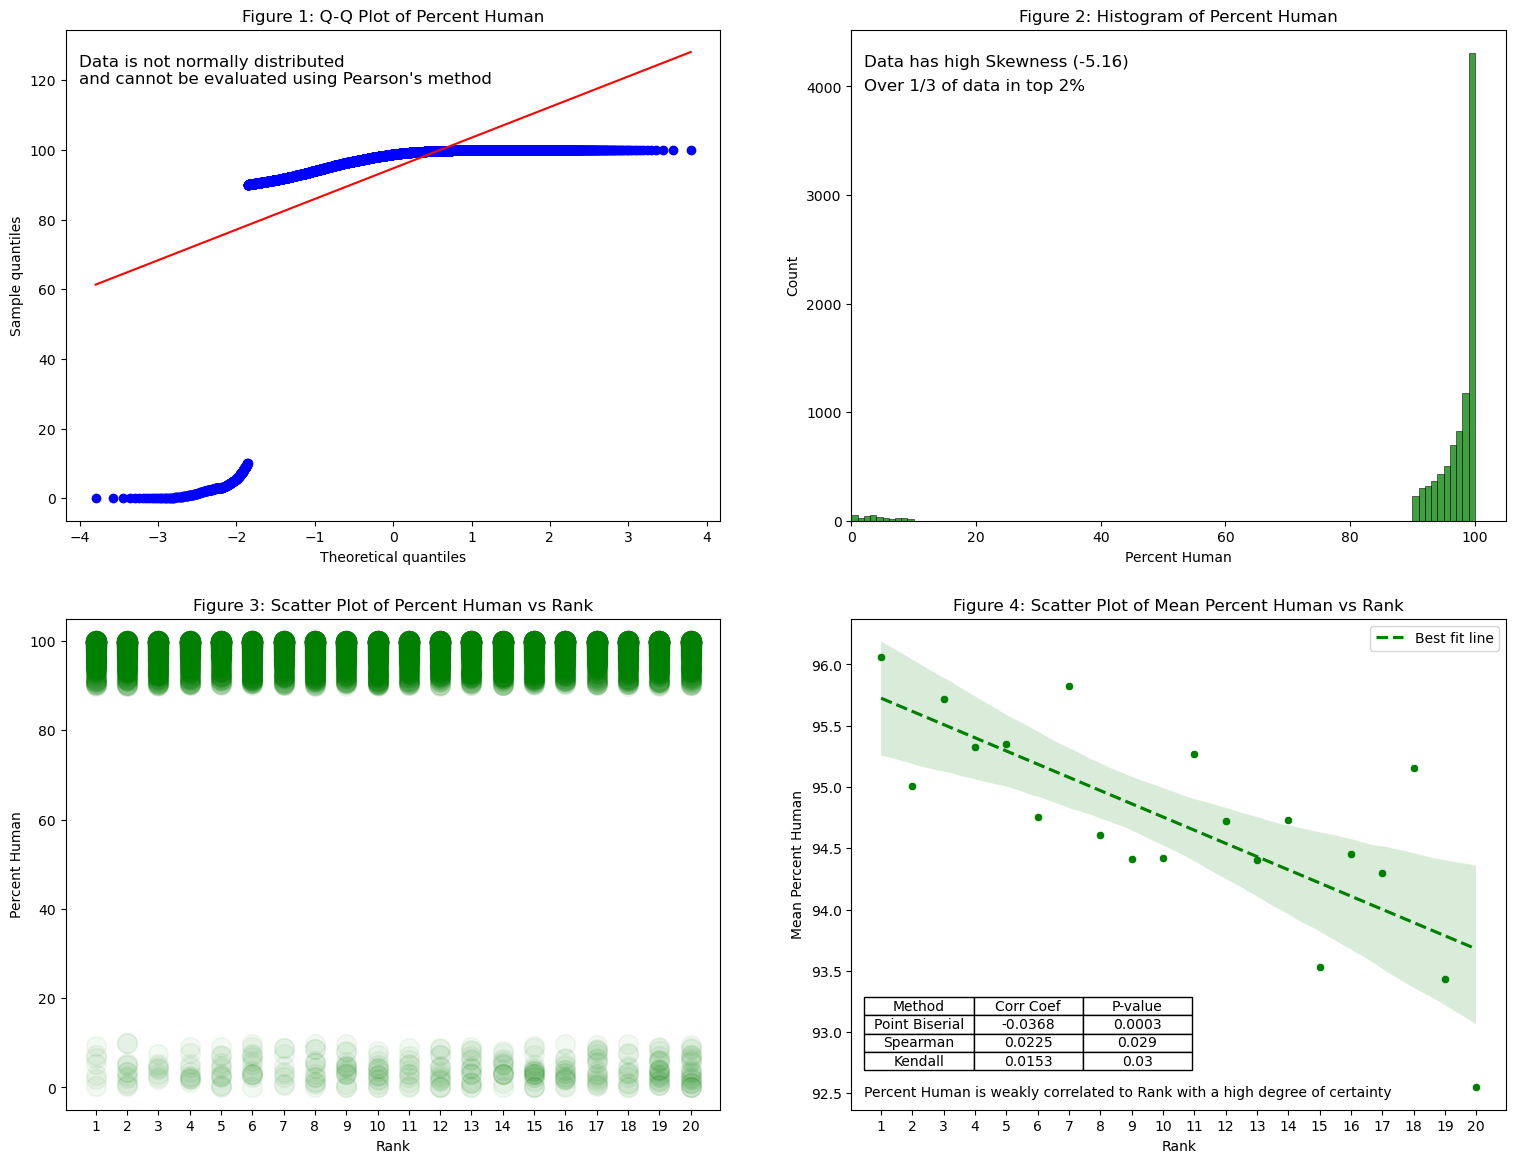

In [60]:
multiplot(df_90_10)

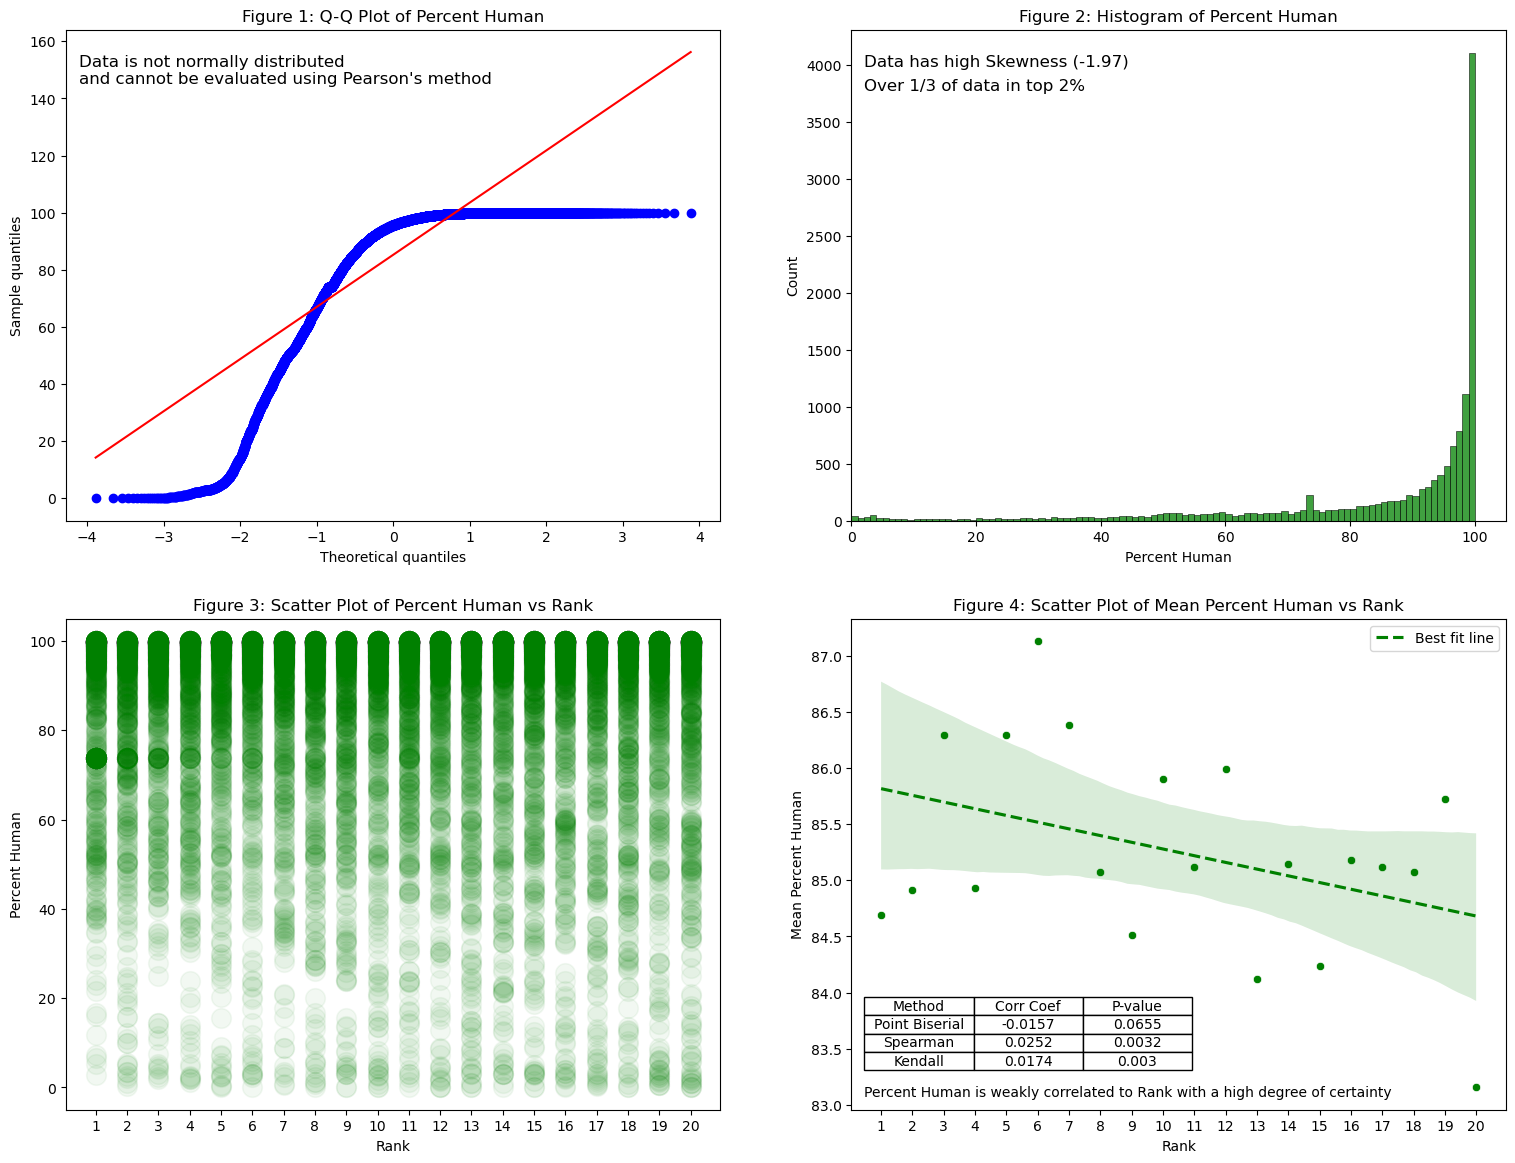

13683 datapoints


In [66]:
df_10_ky = df.groupby('kw').filter(lambda x: len(x) >= 10)
multiplot(df_10_ky)
print(f'{len(df_10_ky)} datapoints')

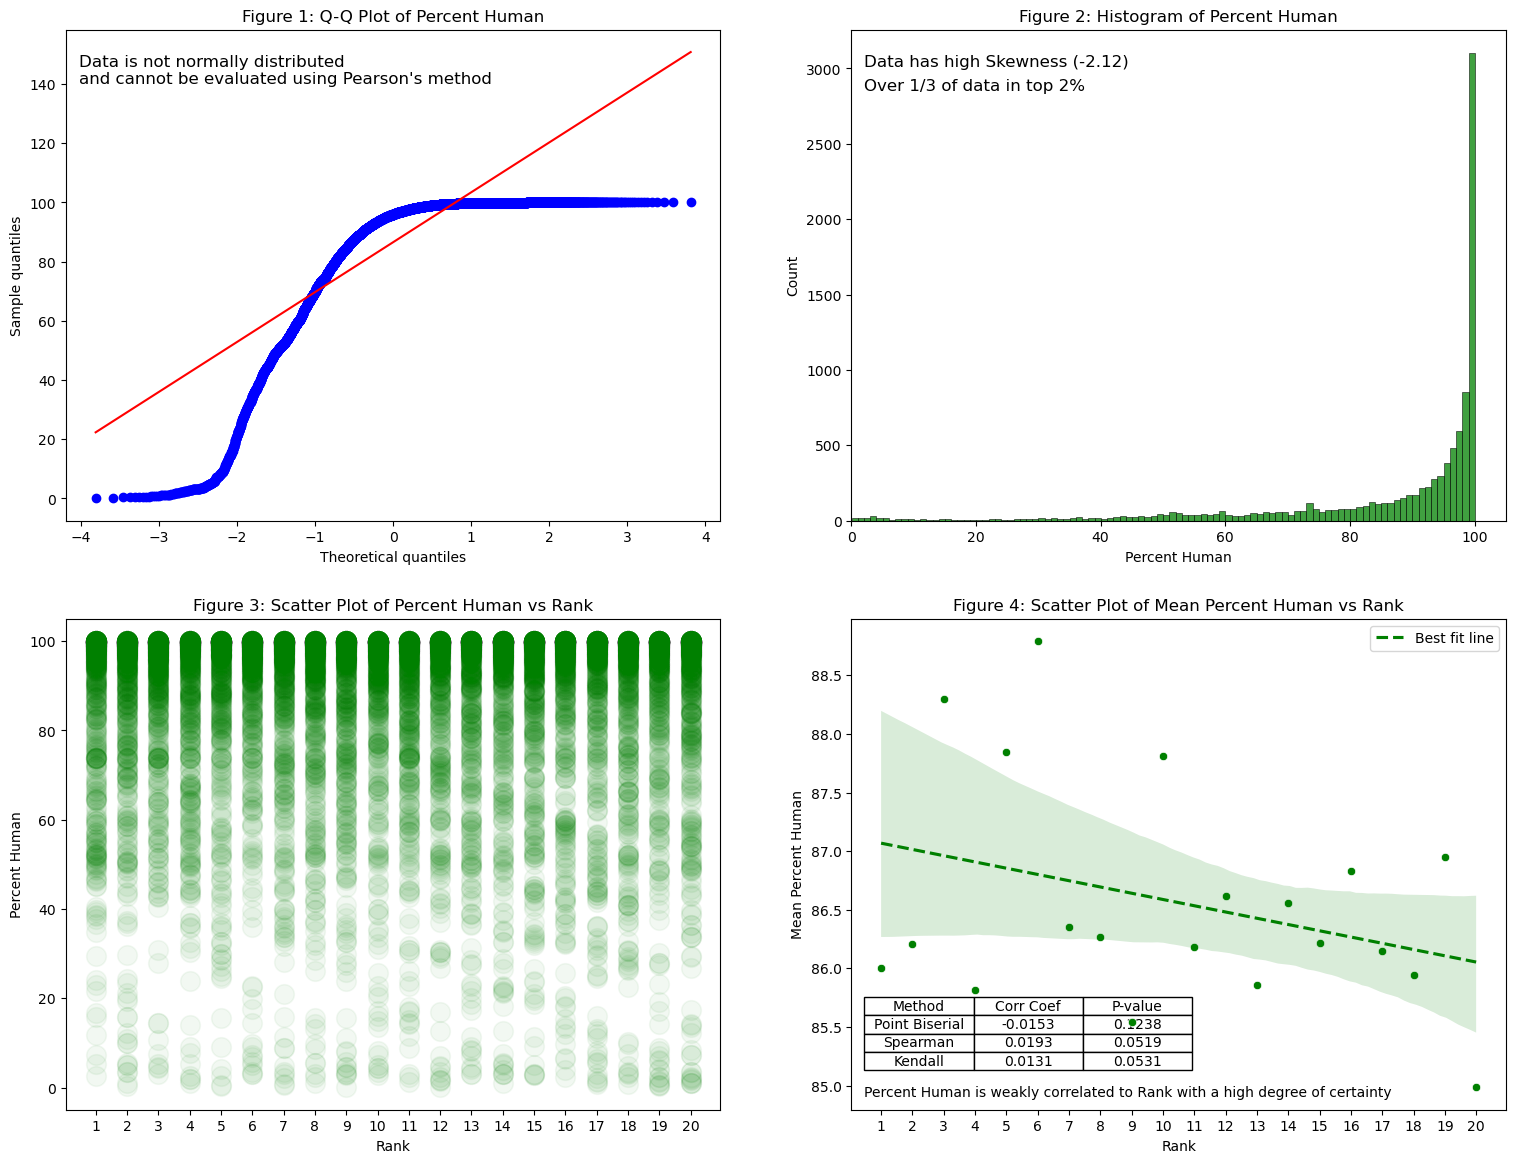

10107 datapoints


In [67]:
df_15_ky = df.groupby('kw').filter(lambda x: len(x) >= 15)
multiplot(df_15_ky)
print(f'{len(df_15_ky)} datapoints')

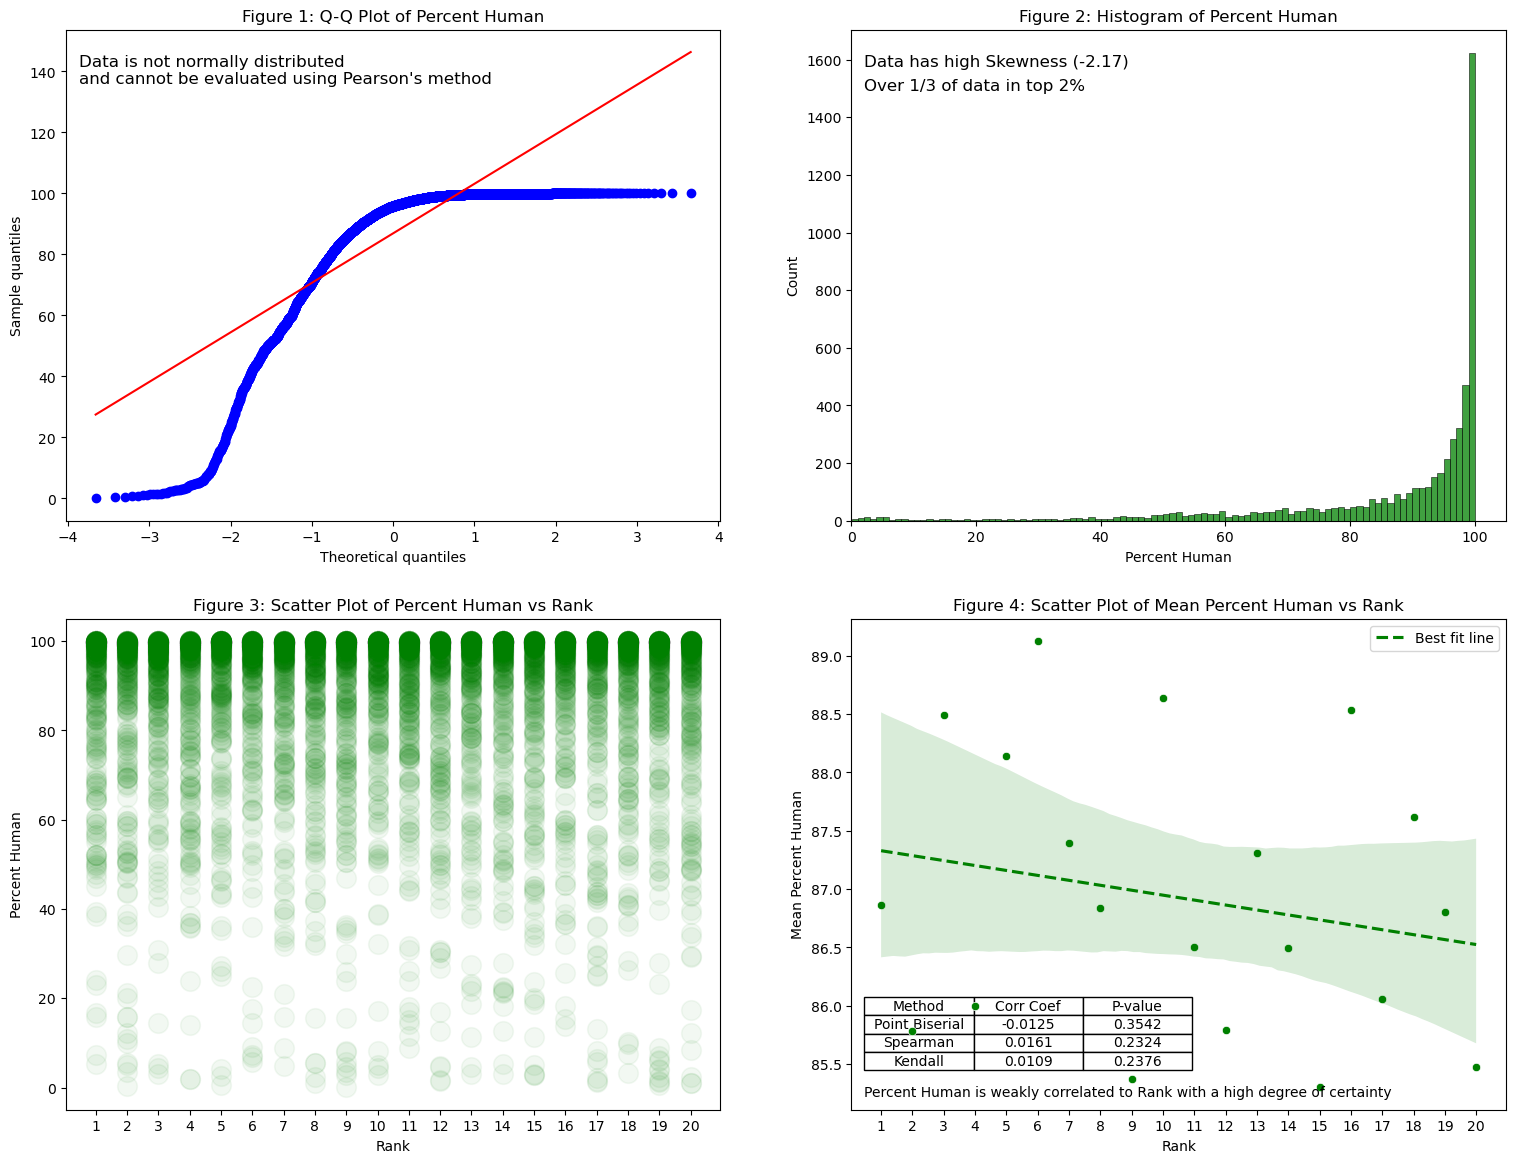

5485 datapoints


In [68]:
df_18_ky = df.groupby('kw').filter(lambda x: len(x) >= 18)
multiplot(df_18_ky)
print(f'{len(df_18_ky)} datapoints')

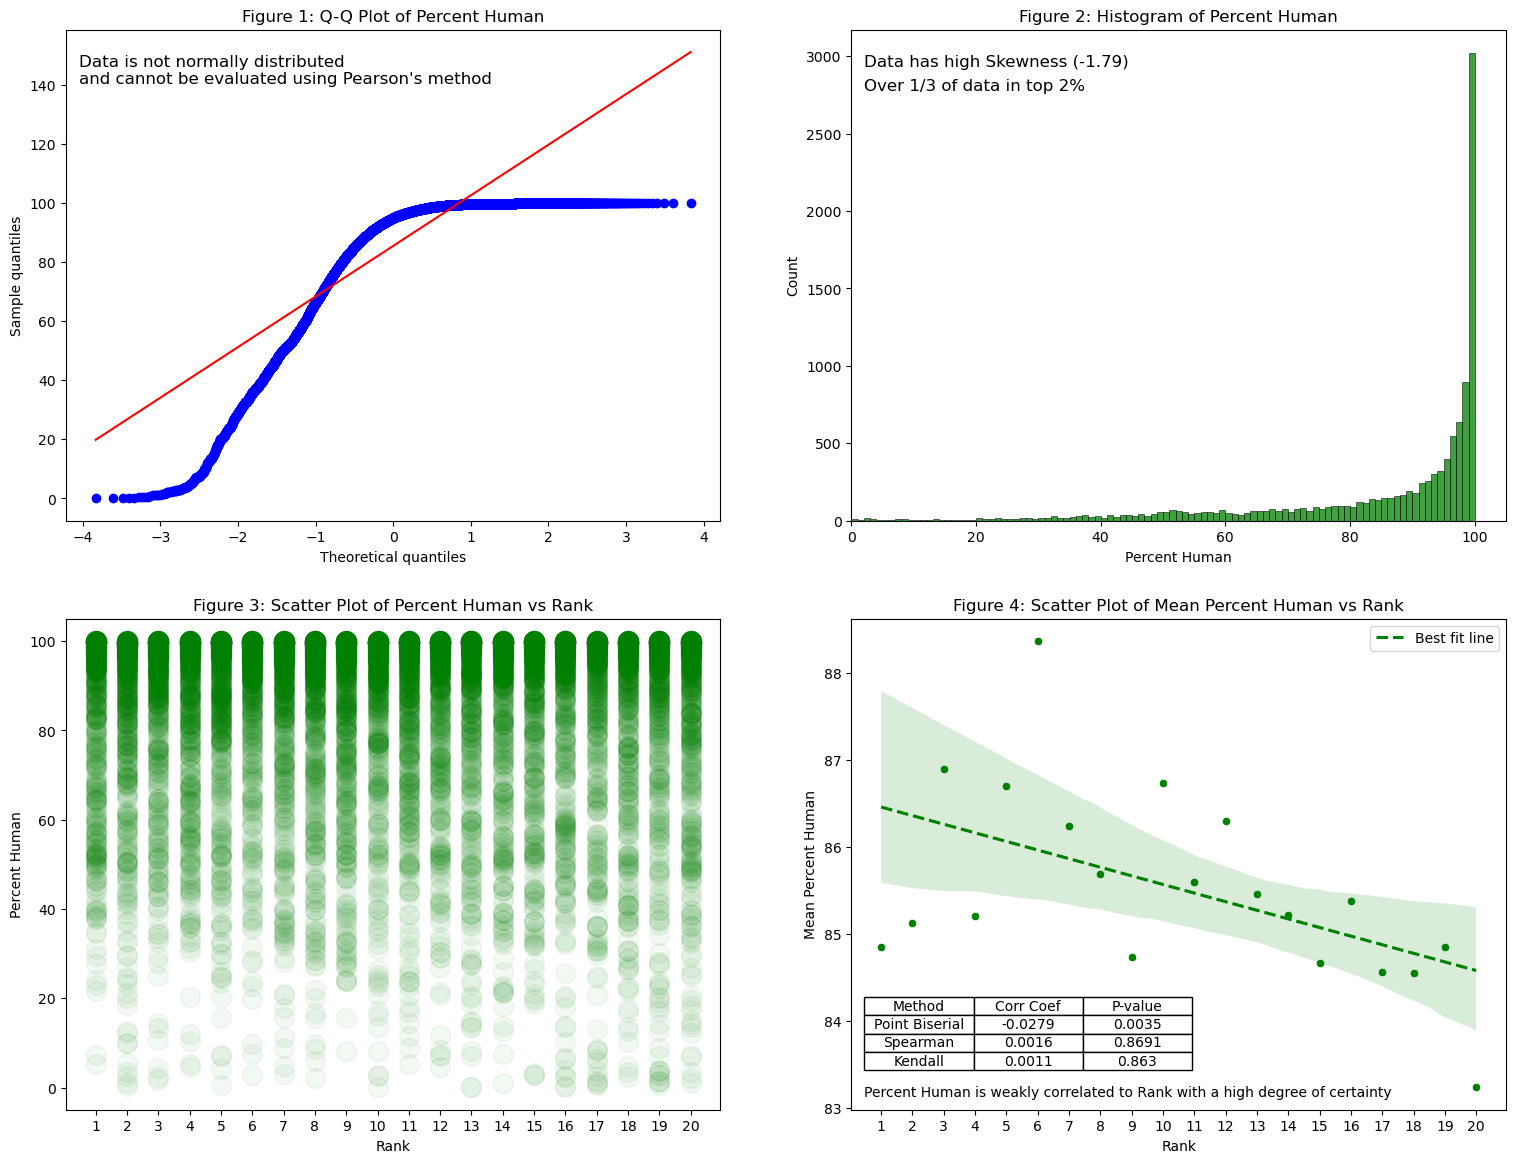

11000 datapoints


In [71]:
df_wc_500 = df[df['word_count']>= 500]
multiplot(df_wc_500)
print(f'{len(df_wc_500)} datapoints')

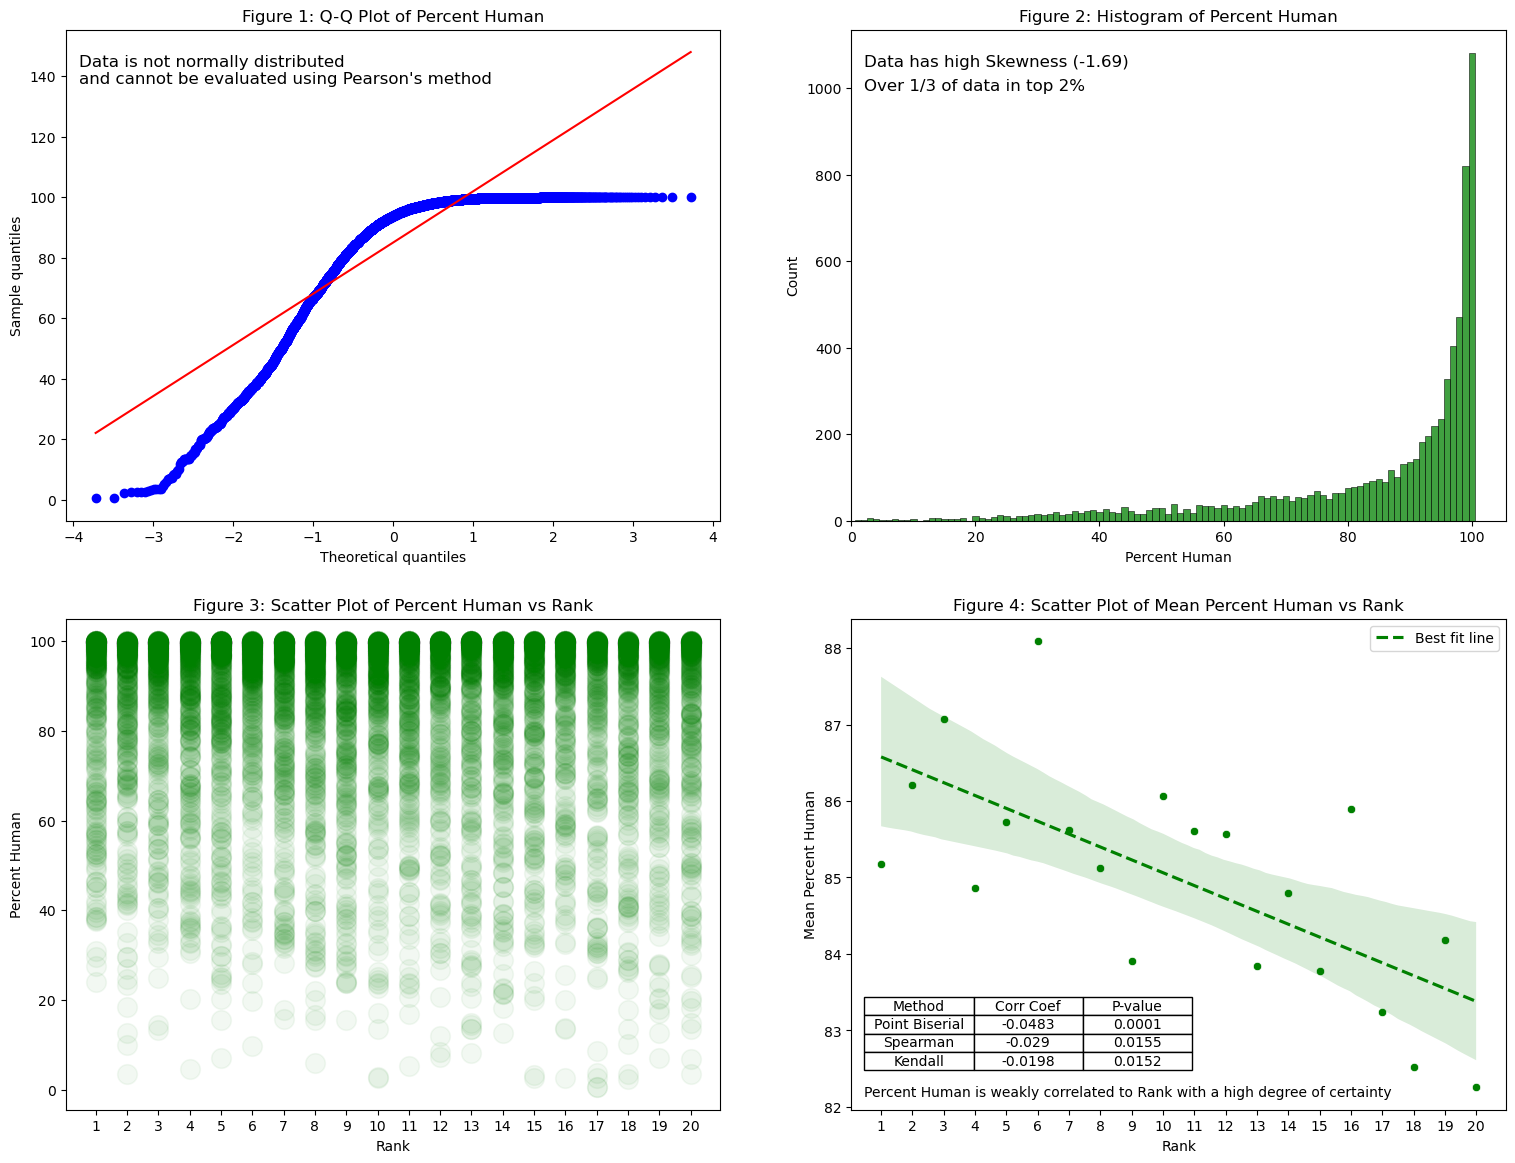

6987 datapoints


In [72]:
df_wc_1000 = df[df['word_count']>= 1000]
multiplot(df_wc_1000)
print(f'{len(df_wc_1000)} datapoints')

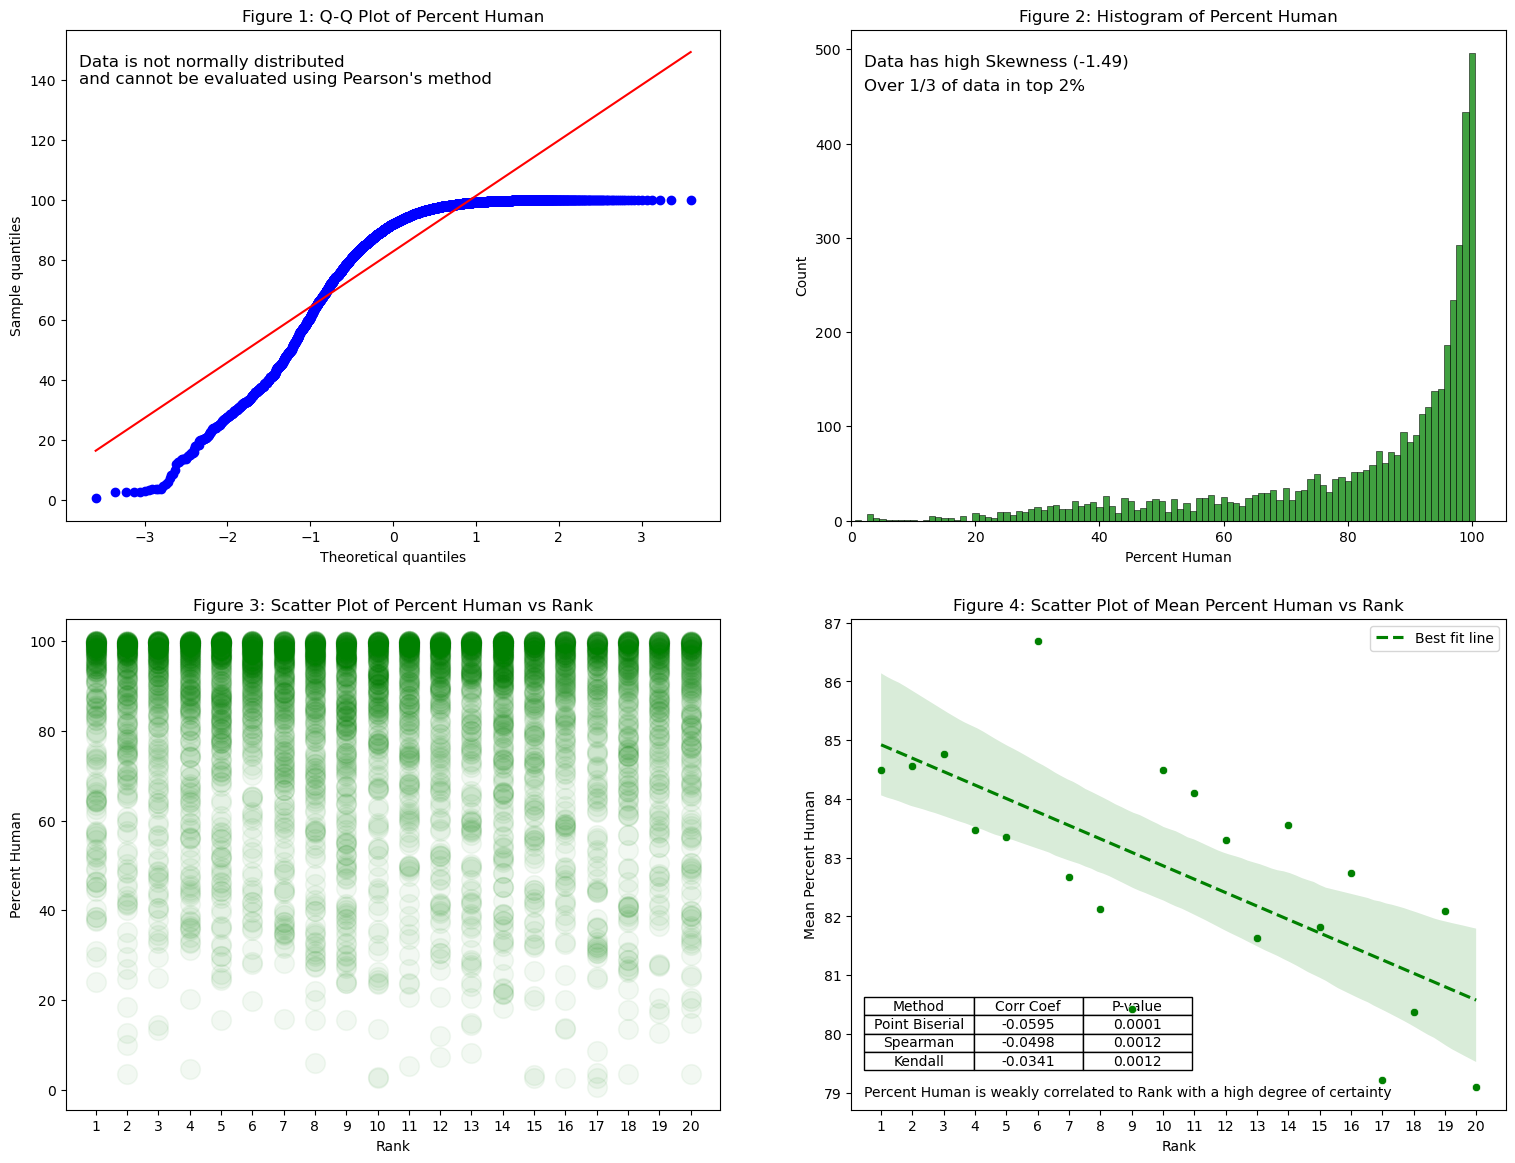

4209 datapoints


In [73]:
df_wc_1500 = df[df['word_count']>= 1500]
multiplot(df_wc_1500)
print(f'{len(df_wc_1500)} datapoints')

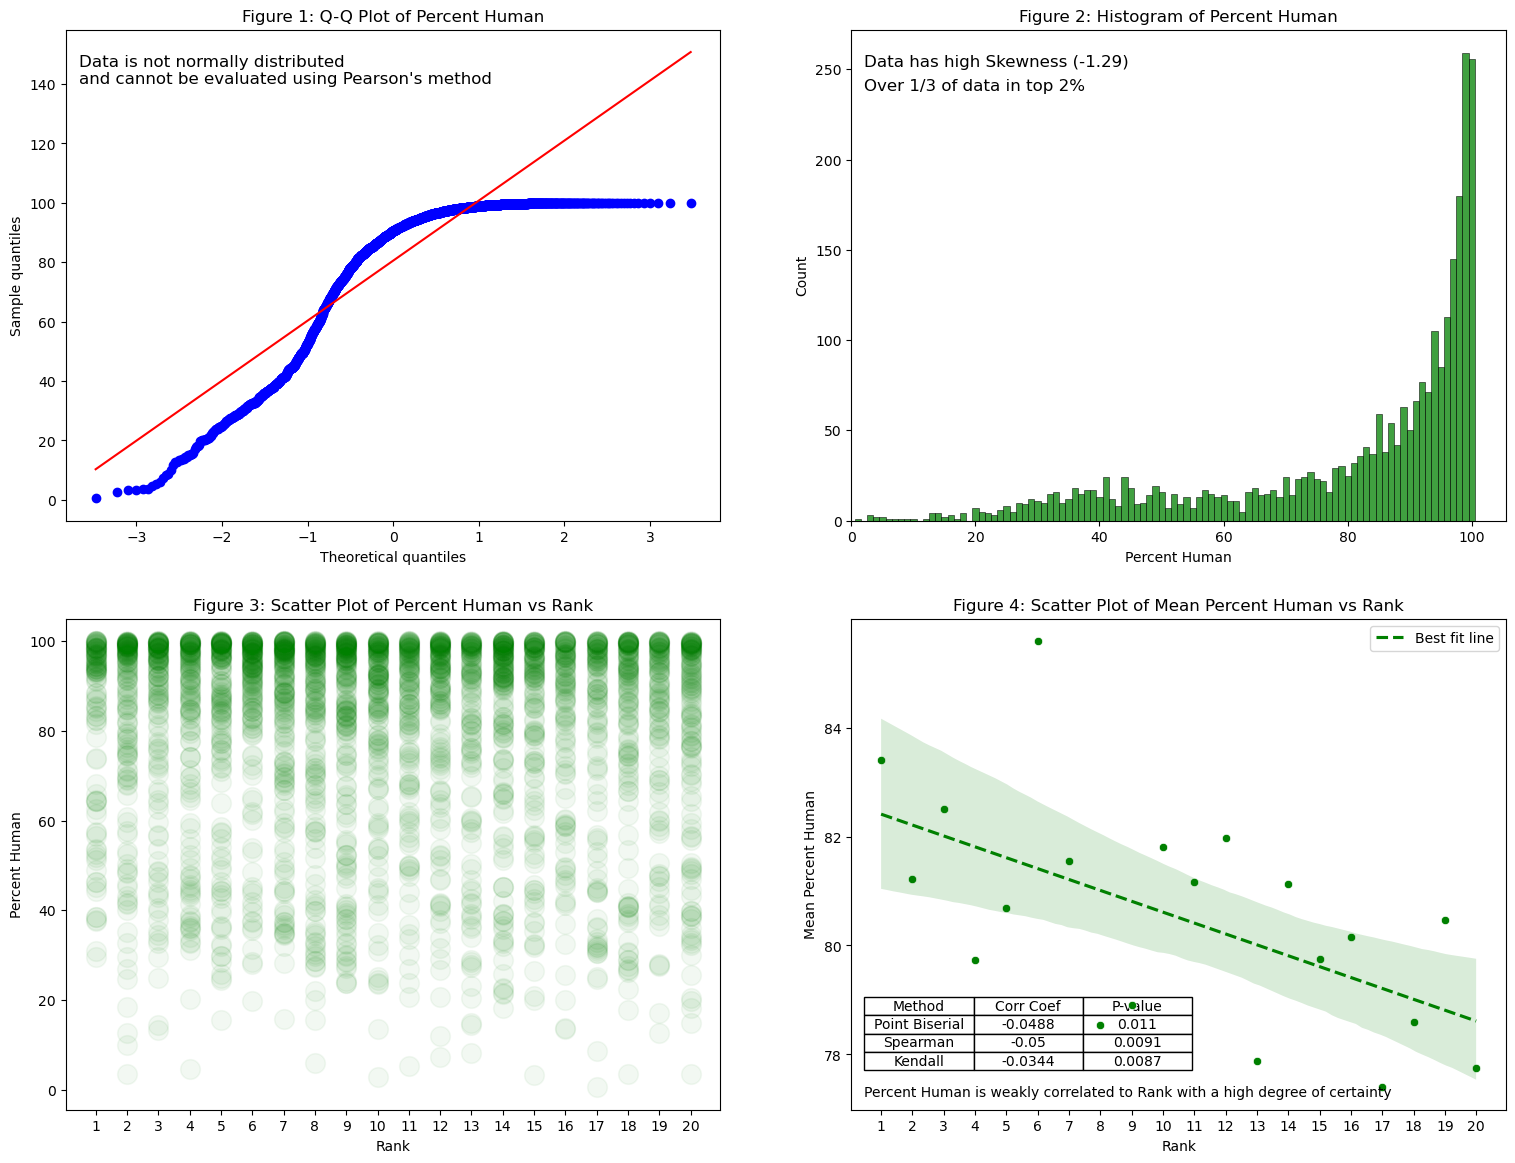

2718 datapoints


In [74]:
df_wc_2000 = df[df['word_count']>= 2000]
multiplot(df_wc_2000)
print(f'{len(df_wc_2000)} datapoints')

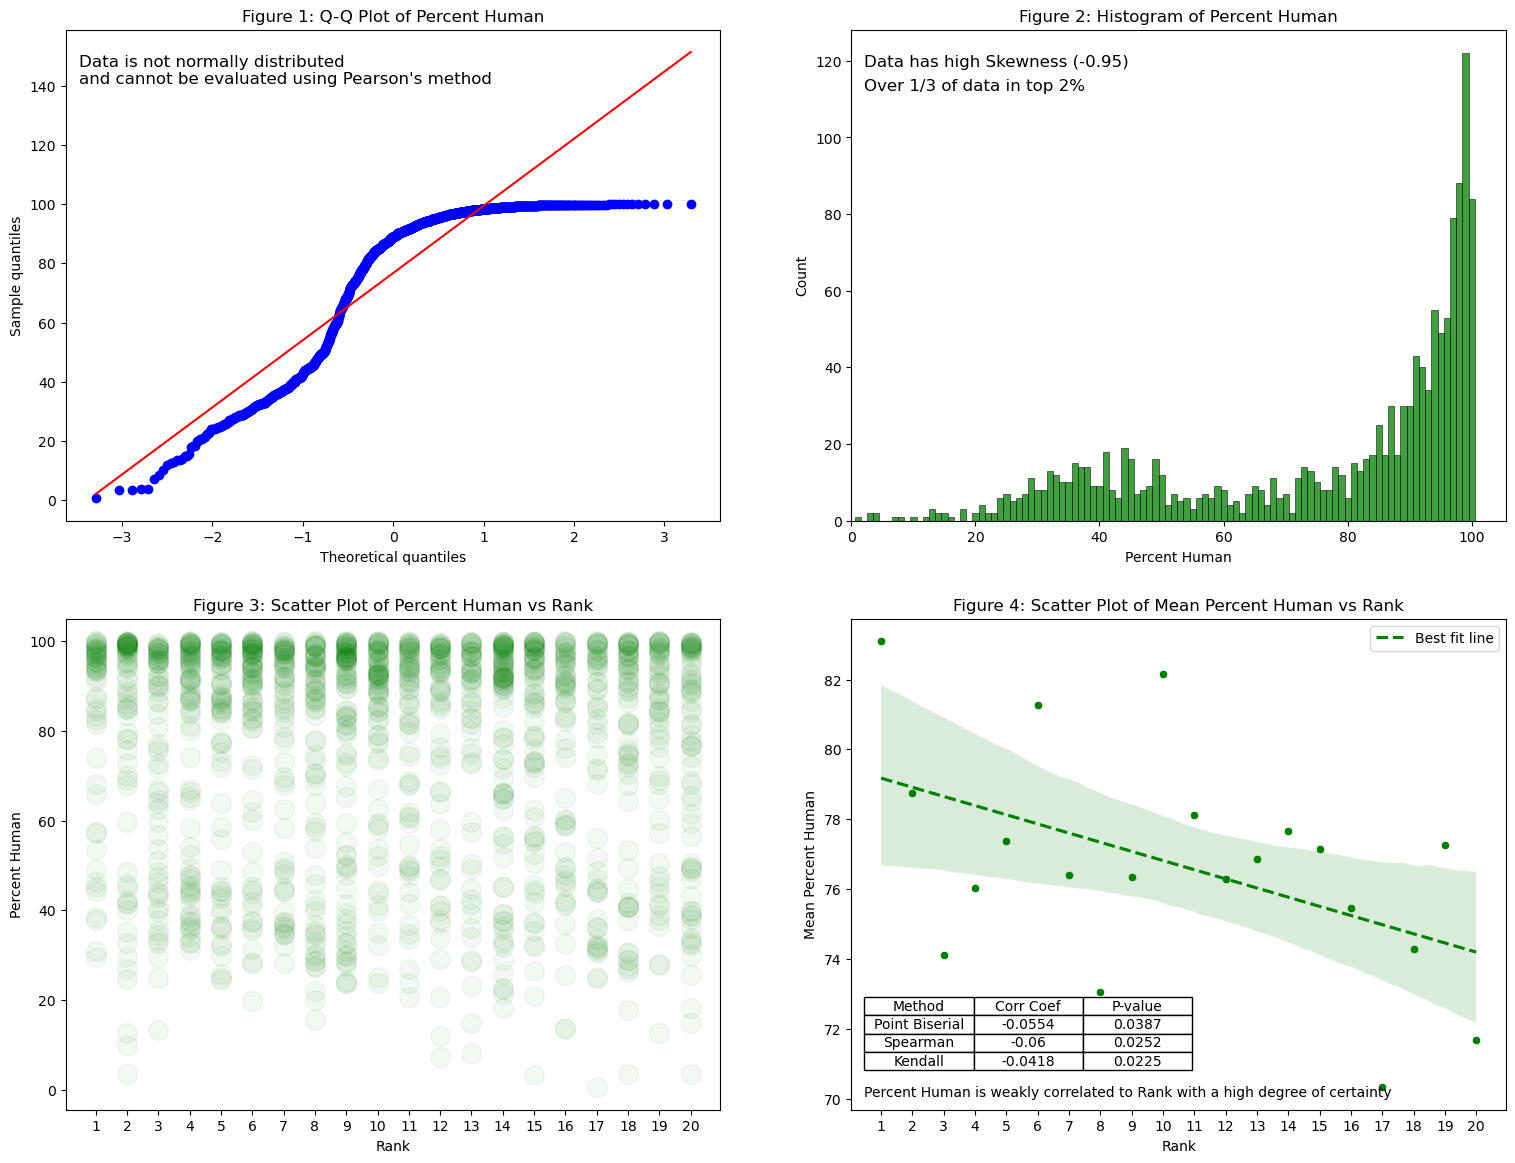

1392 datapoints


In [76]:
df_wc_3000 = df[df['word_count']>= 3000]
multiplot(df_wc_3000)
print(f'{len(df_wc_3000)} datapoints')

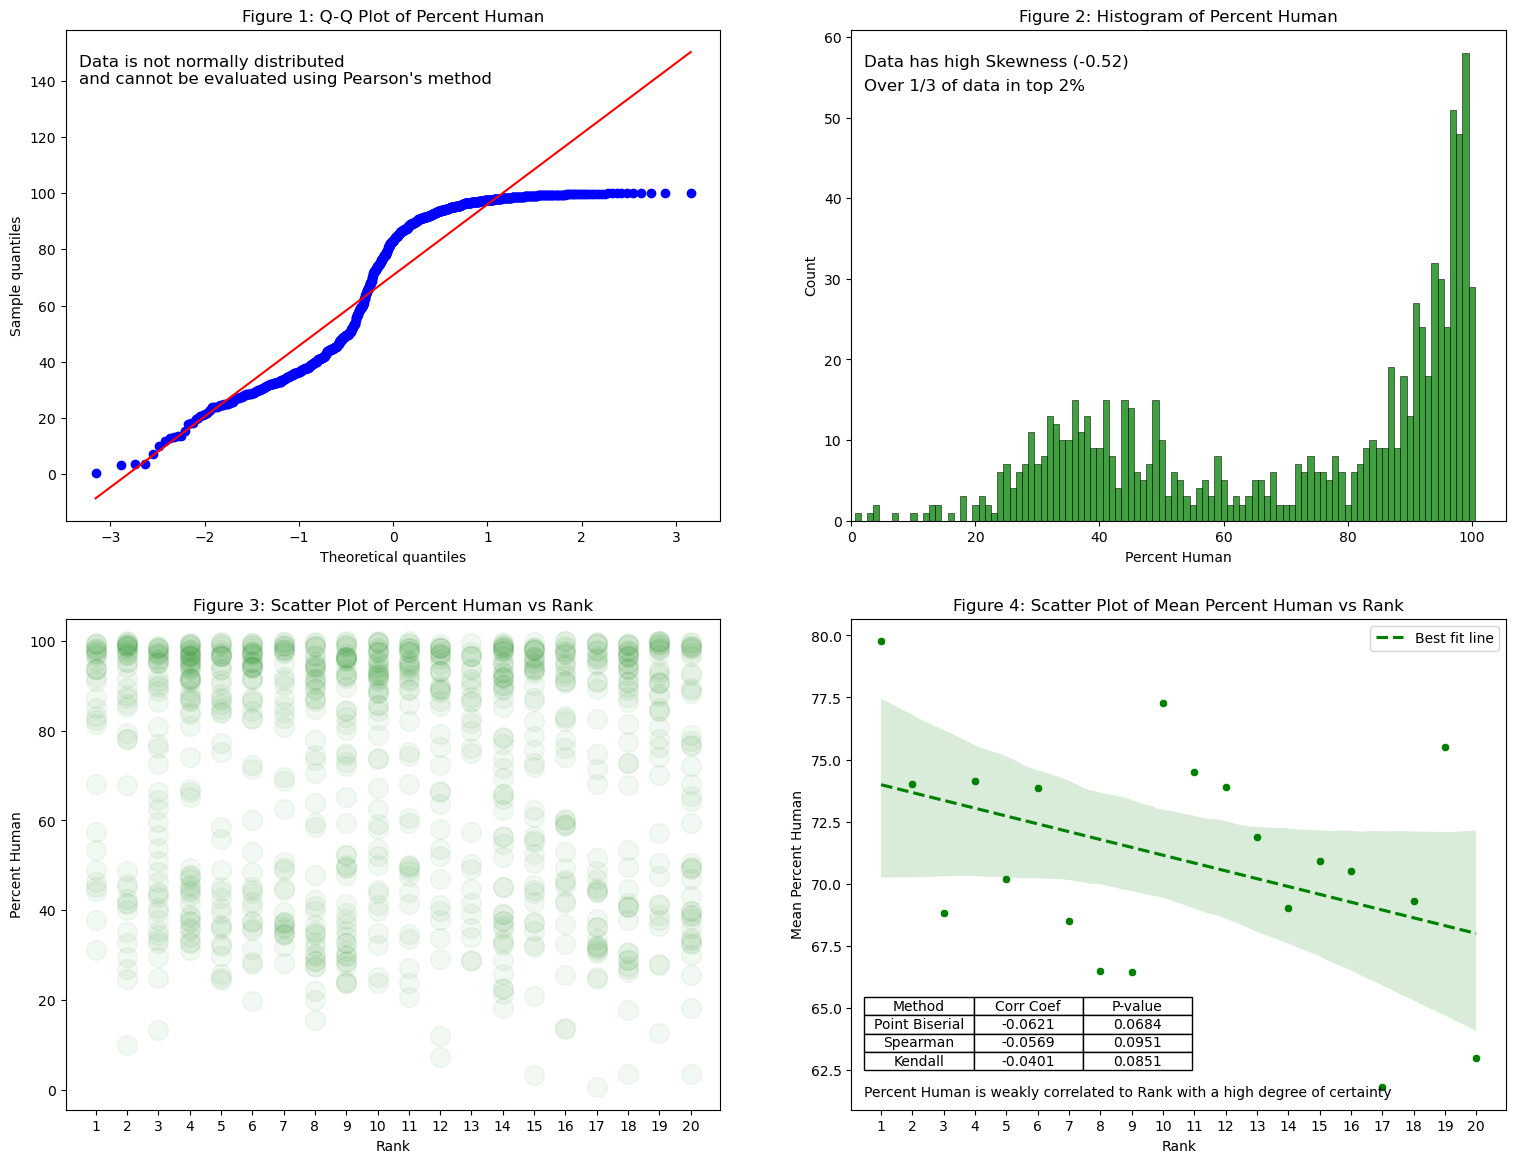

863 datapoints


In [77]:
df_wc_4000 = df[df['word_count']>= 4000]
multiplot(df_wc_4000)
print(f'{len(df_wc_4000)} datapoints')

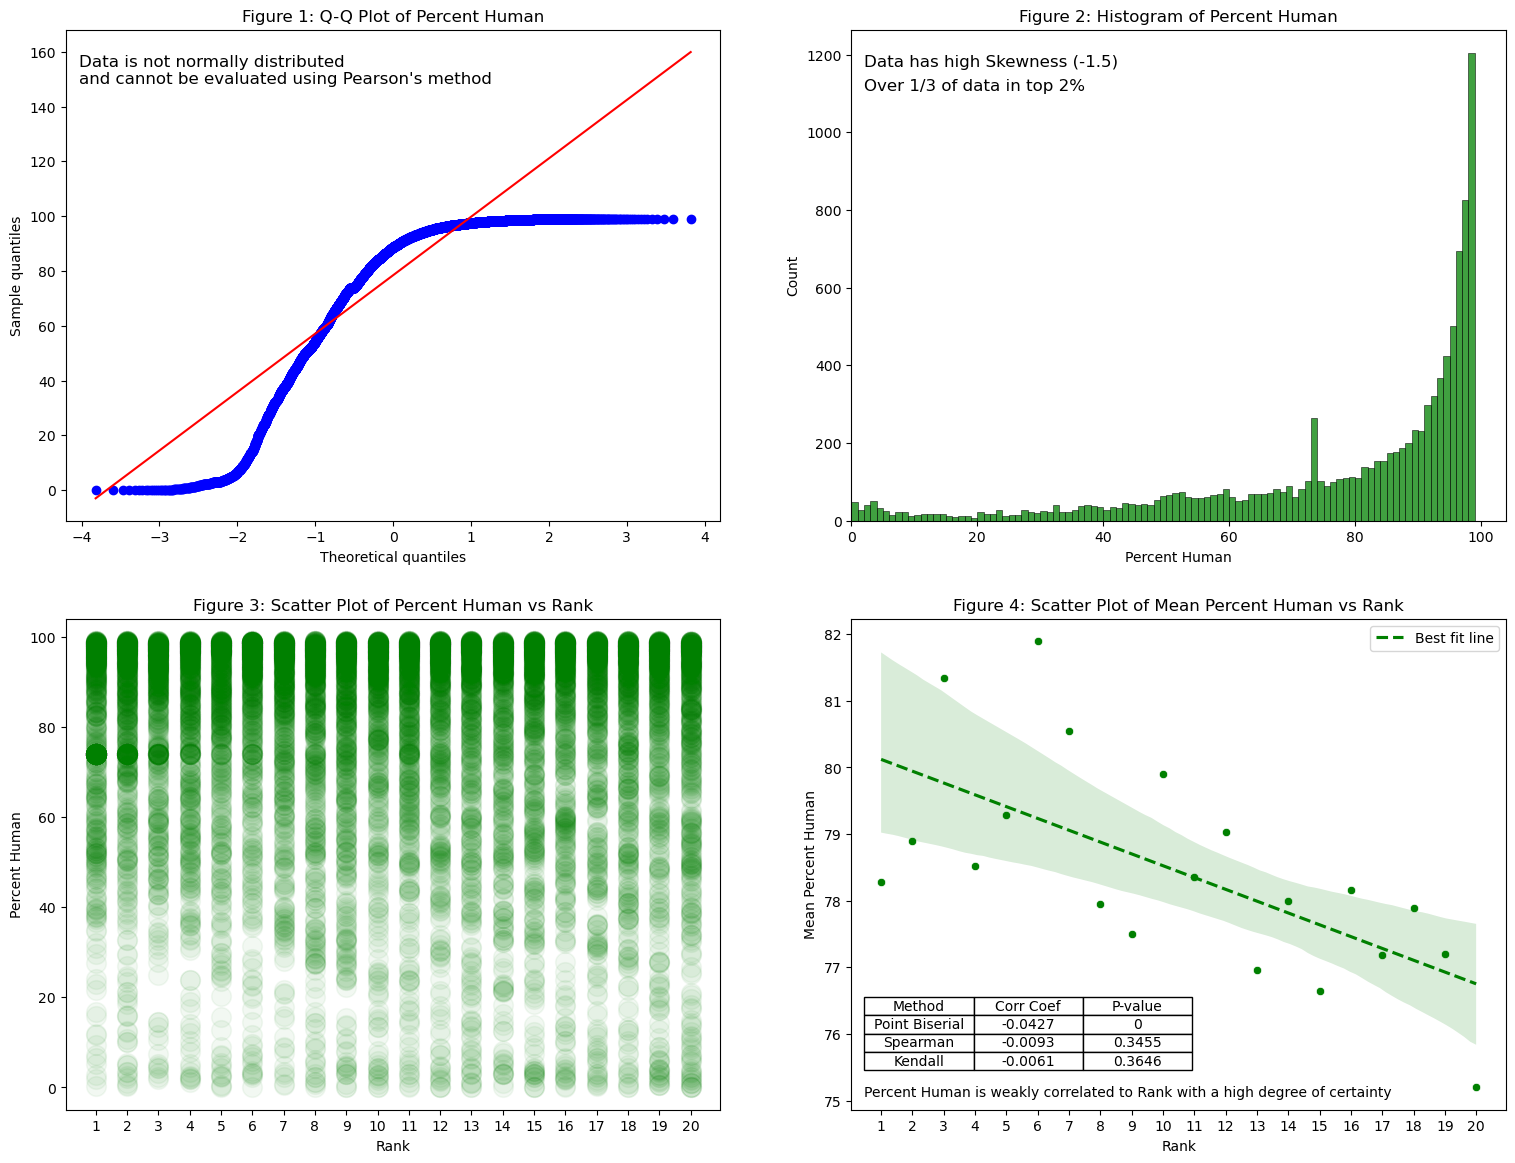

10359 datapoints


In [79]:
df_ph_less_99 = df[df['percent_human']<= 99]
multiplot(df_ph_less_99)
print(f'{len(df_ph_less_99)} datapoints')

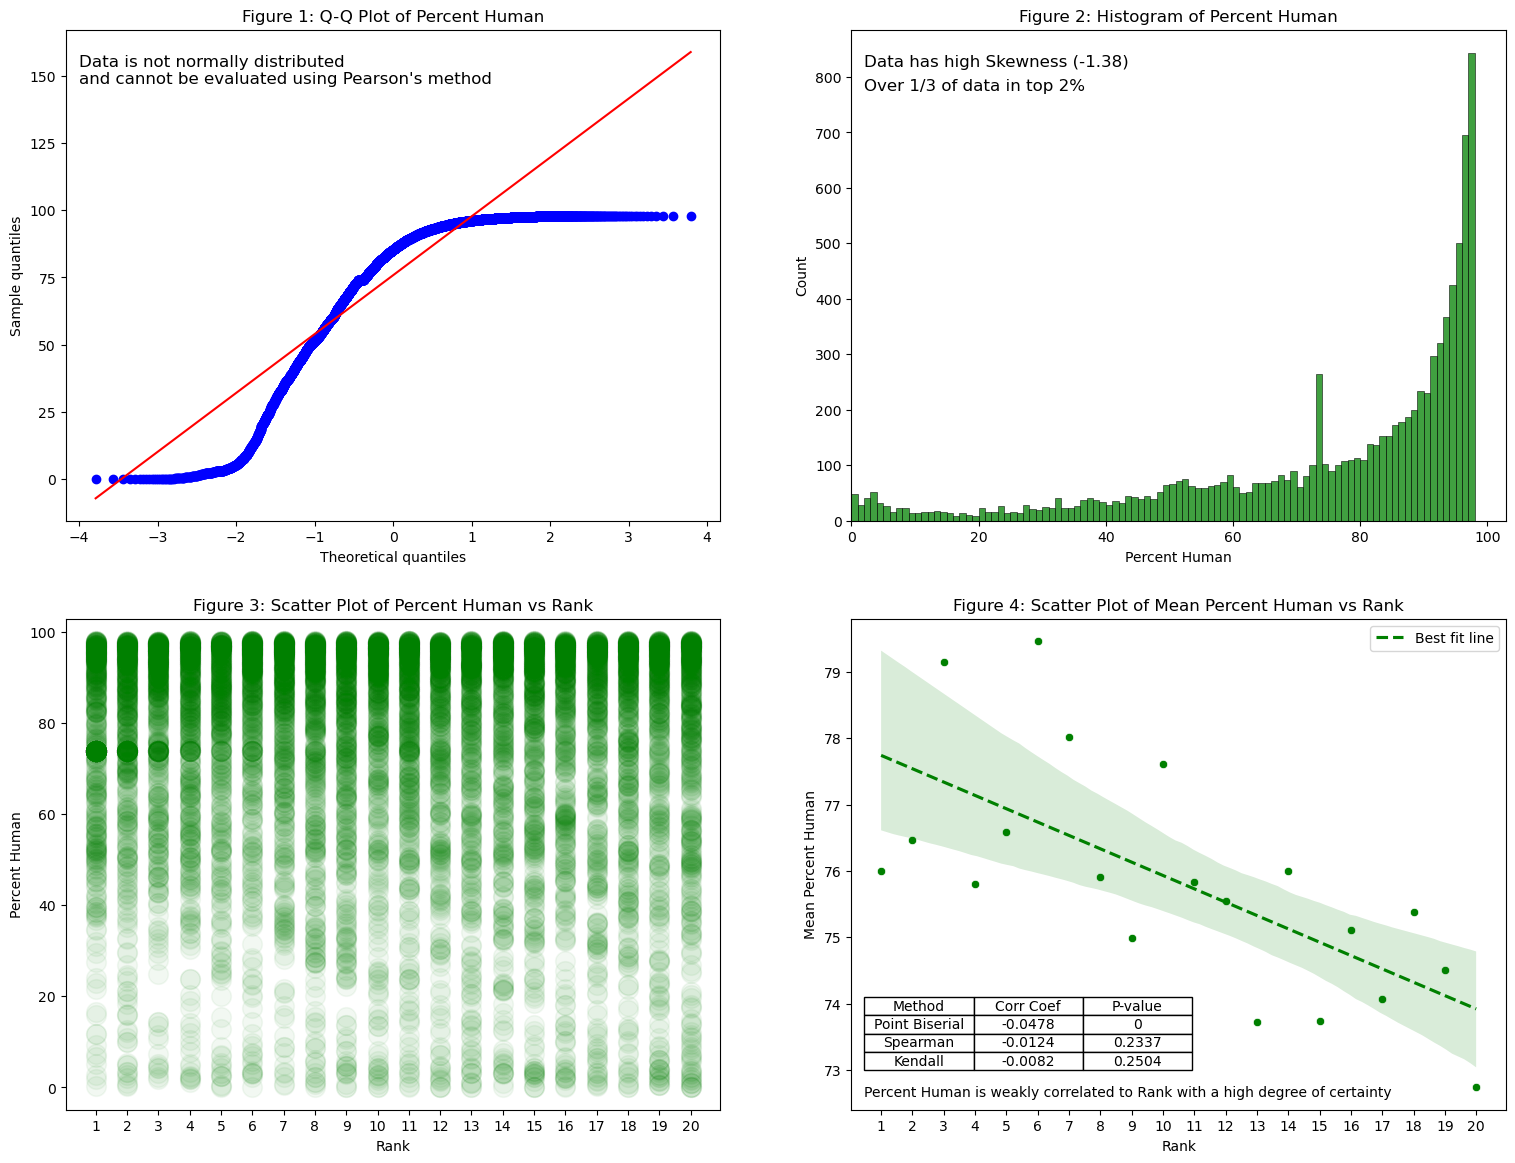

9172 datapoints


In [80]:
df_ph_less_98 = df[df['percent_human']<= 98]
multiplot(df_ph_less_98)
print(f'{len(df_ph_less_98)} datapoints')

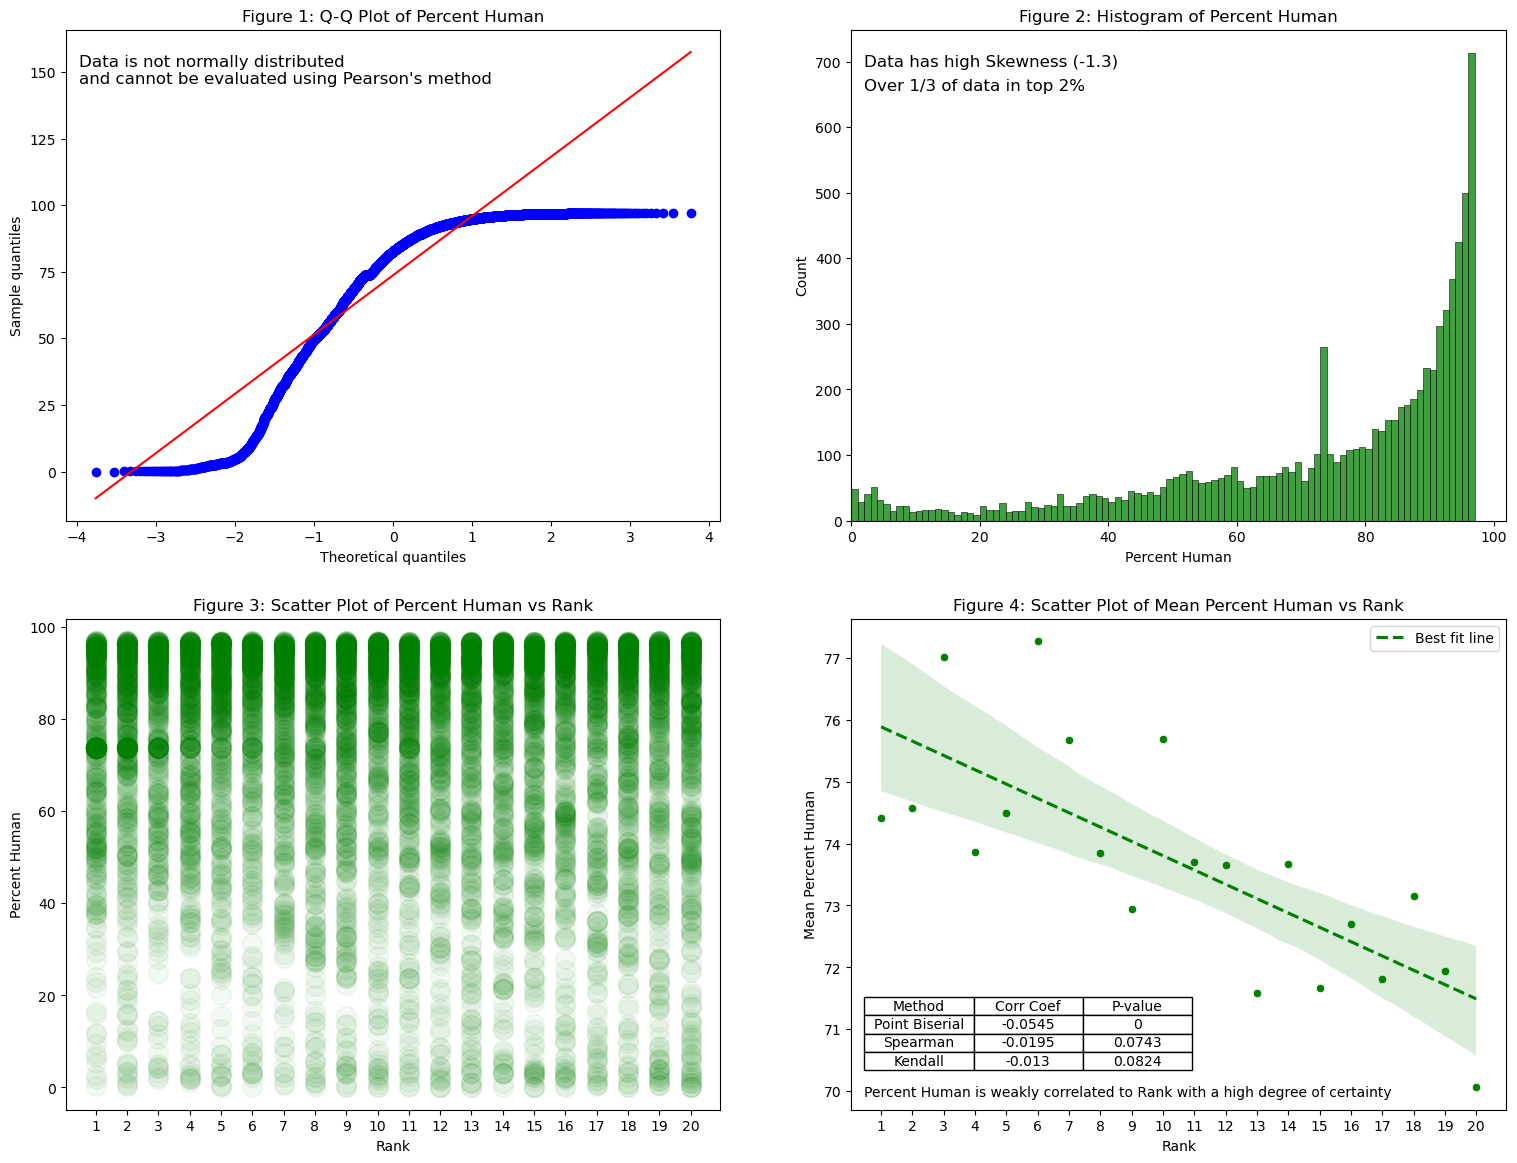

8347 datapoints


In [81]:
df_ph_less_97 = df[df['percent_human']<= 97]
multiplot(df_ph_less_97)
print(f'{len(df_ph_less_97)} datapoints')

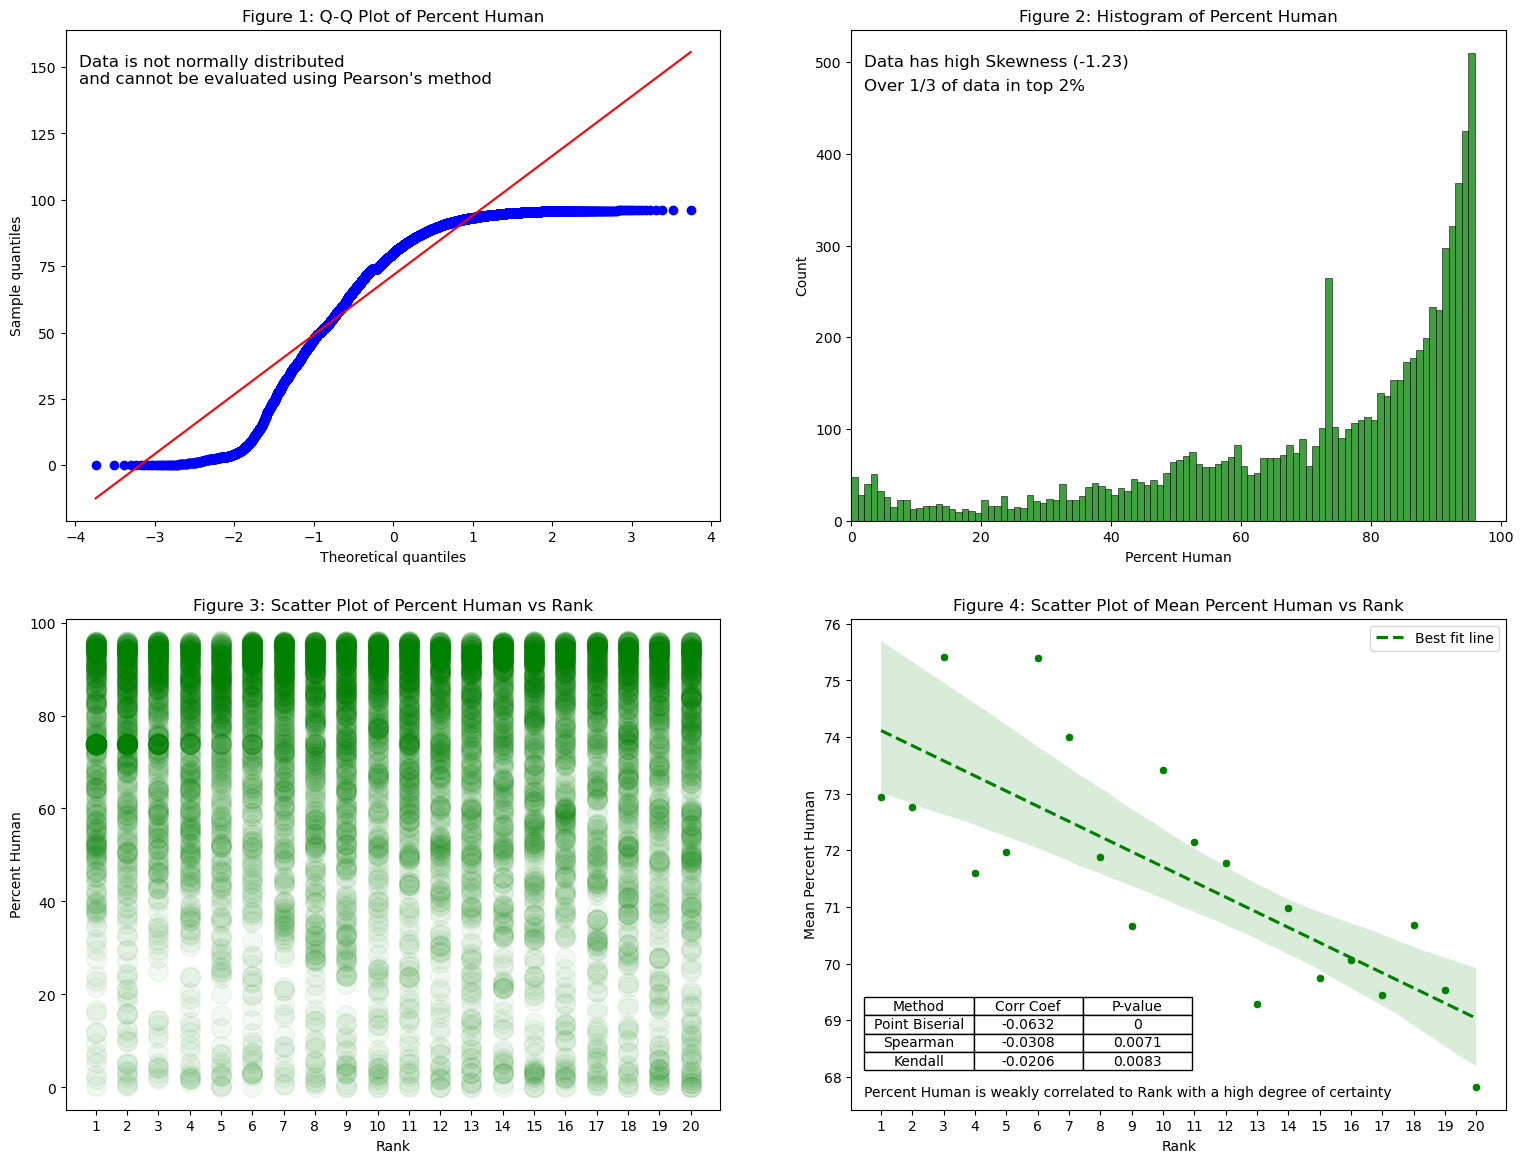

7644 datapoints


In [82]:
df_ph_less_96 = df[df['percent_human']<= 96]
multiplot(df_ph_less_96)
print(f'{len(df_ph_less_96)} datapoints')

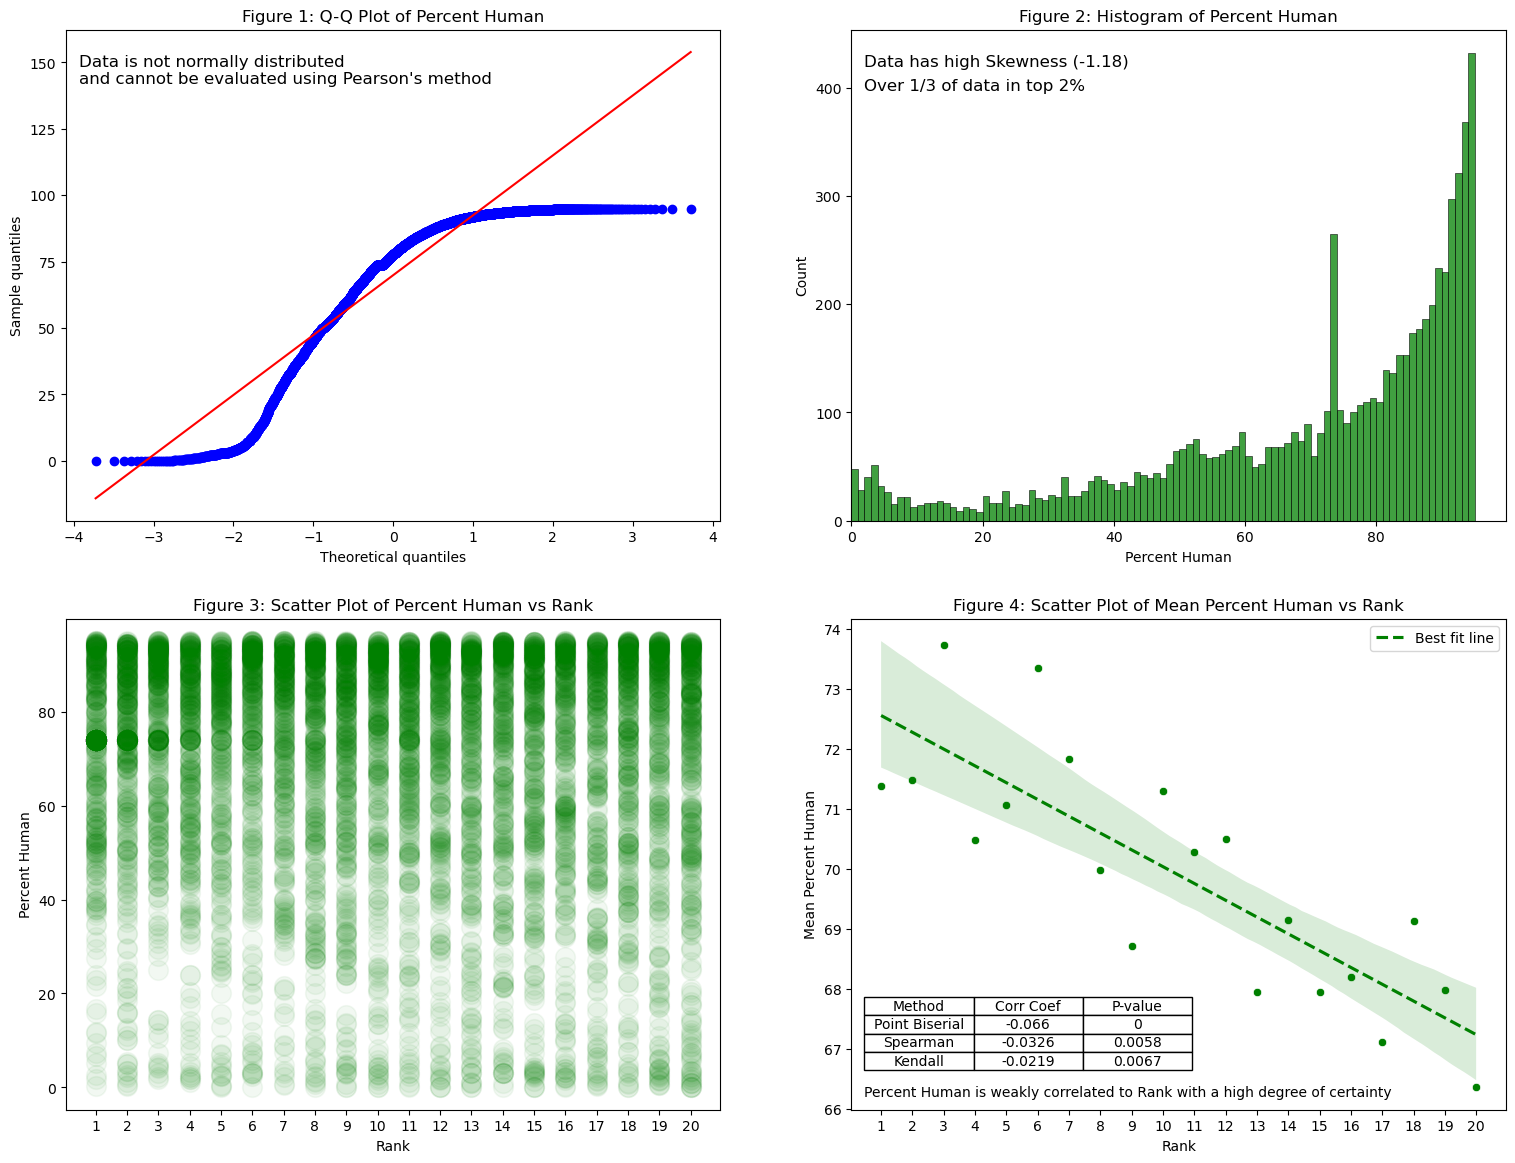

7141 datapoints


In [83]:
df_ph_less_95 = df[df['percent_human']<= 95]
multiplot(df_ph_less_95)
print(f'{len(df_ph_less_95)} datapoints')

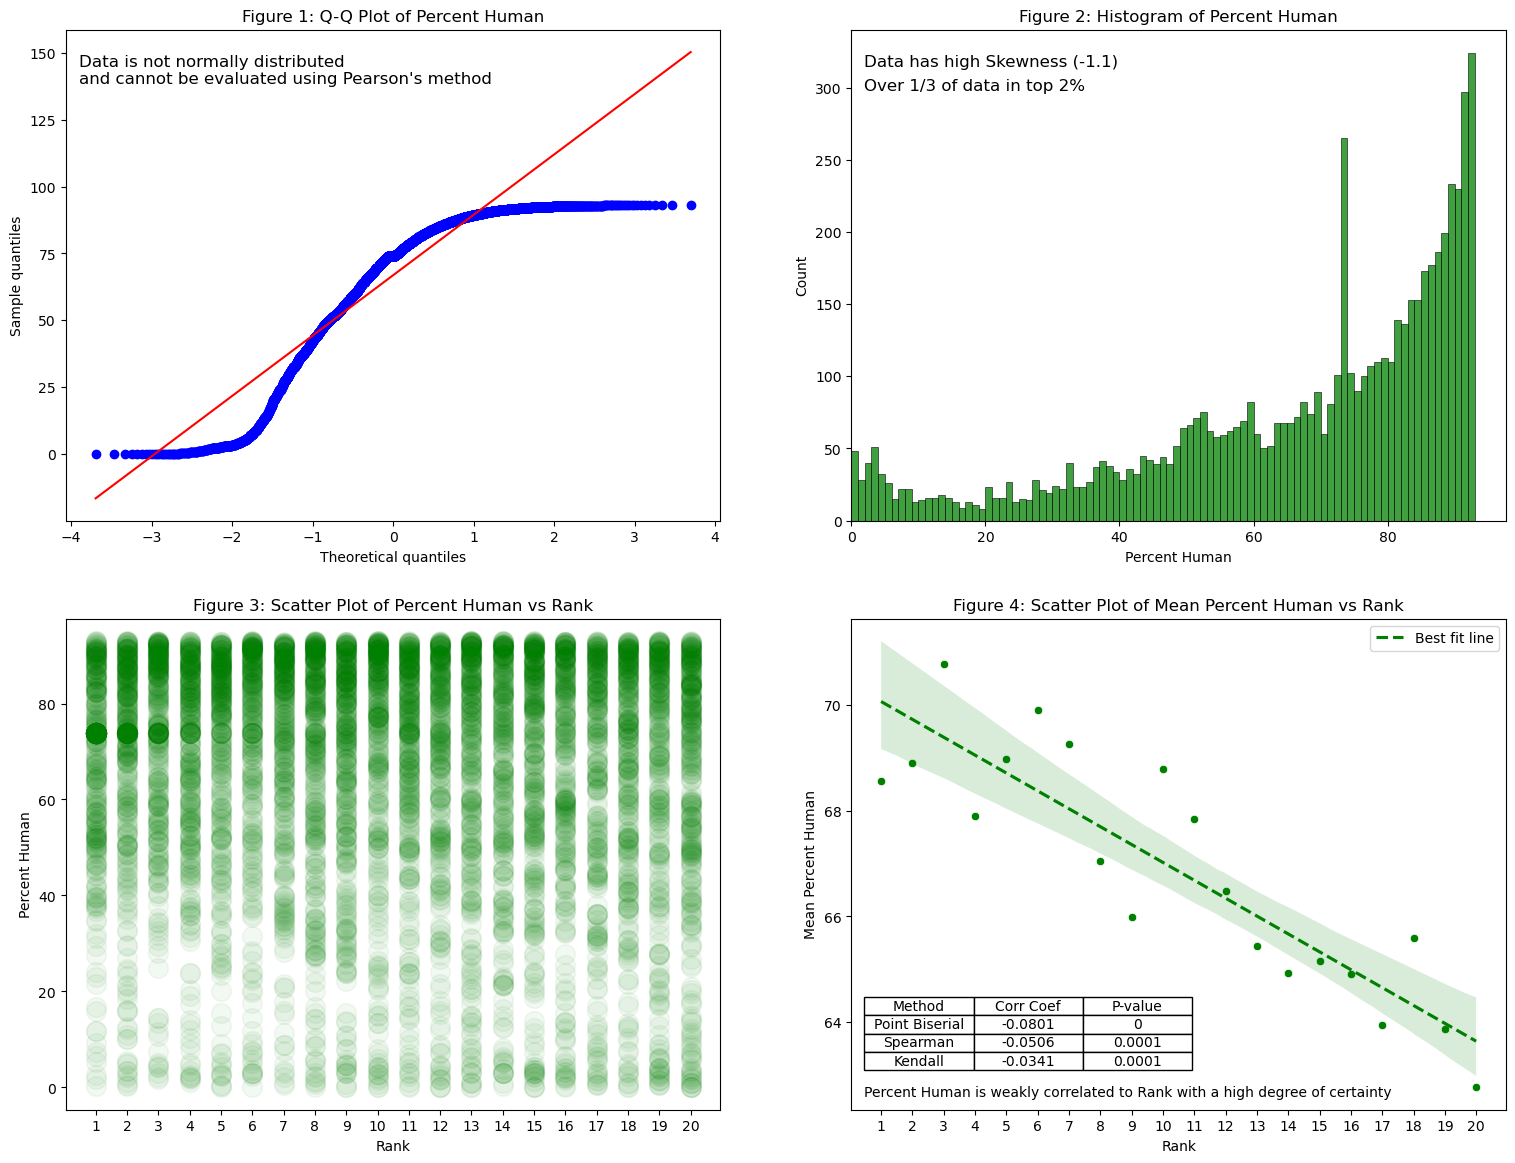

6344 datapoints


In [85]:
df_ph_less_93 = df[df['percent_human']<= 93]
multiplot(df_ph_less_93)
print(f'{len(df_ph_less_93)} datapoints')

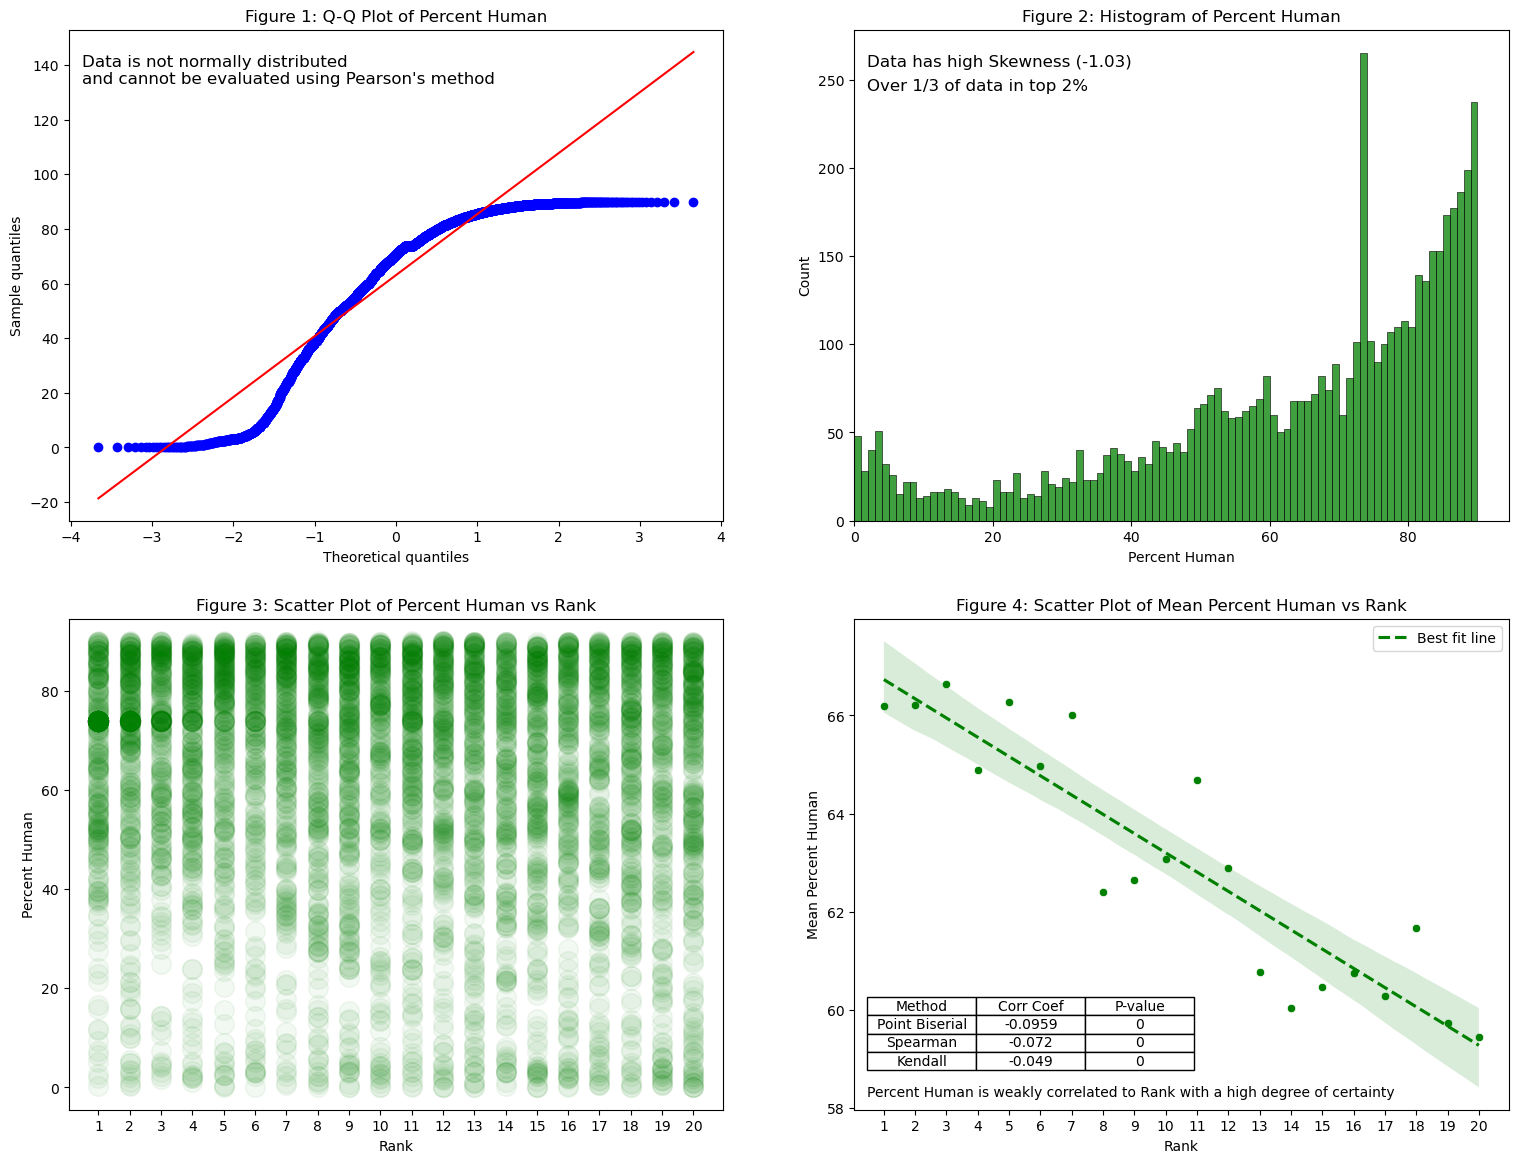

5497 datapoints


In [84]:
df_ph_less_90 = df[df['percent_human']<= 90]
multiplot(df_ph_less_90)
print(f'{len(df_ph_less_90)} datapoints')

In [86]:
# try cube roots